In [5]:
import pandas as pd
import geopandas as gpd

## Read data
### 2018 Census county boundaries

In [90]:
bounds = gpd.read_file(
    'datasets_extra/cb_2018_us_county_20m.zip'
).filter([
    'GEOID', 'NAME', 'geometry'
])

bounds.columns = ['fips', 'name', 'geometry']

bounds

,fips,name,geometry
0,37017,Bladen,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37167,Stanly,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39153,Summit,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42113,Sullivan,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48459,Upshur,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."
...,...,...,...
3215,38005,Benson,"POLYGON ((-99.84661 48.37130, -99.49292 48.370..."
3216,72079,Lajas,"POLYGON ((-67.10904 18.05608, -67.06791 18.066..."
3217,31159,Seward,"POLYGON ((-97.36812 41.04695, -96.91094 41.046..."
3218,37023,Burke,"POLYGON ((-81.90665 35.88338, -81.94319 35.960..."


### Safegraph origin-destination matrix

In [3]:
od = (
    pd.read_csv(
        'datasets/Aggregated_safegraph_od_2021_county_04012021_04052021.csv'
    )
)

In [73]:
od

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
0,47053,28143,18,35.919,-88.814,34.770,-90.364
1,40119,20045,8,36.110,-97.076,38.951,-95.206
2,45067,19057,1,34.188,-79.392,40.990,-91.058
3,6095,56025,4,38.147,-122.178,42.866,-106.312
4,55135,55079,137,44.429,-88.957,43.002,-87.968
...,...,...,...,...,...,...,...
1107709,37001,47125,8,36.085,-79.433,36.570,-87.286
1107710,45045,42115,1,34.779,-82.235,41.852,-75.743
1107711,39021,39143,3,40.059,-83.763,41.338,-82.989
1107712,26025,55135,1,42.114,-85.087,44.325,-88.937


### County-level place connectivity index - PCI (2019)

In [244]:
pci = (
    pd.read_csv(
        'datasets_li/US_County_PCI_2019.csv',
        dtype={'place_i': 'str'}
    )
    .groupby('place_i')
    [['pci']].sum()
    .reset_index()
    .rename(columns={'place_i': 'fips'})
    .assign(
        pci_cat=lambda df_: pd.qcut(
            df_.pci,
            [0, 0.2, 0.4, 0.6, 0.8, 1.0],
            labels=['very low', 'low', 'medium', 'high', 'very high']
        )
    )
)

### Median Age

In [100]:
age = (
    pd.read_csv(
        'datasets_extra/ACSDT5Y2019.B01002-Data.csv',
        skiprows=1
    )
    .filter(['Geography', 'Estimate!!Median age --!!Total:'])
    .assign(Geography=lambda df_: df_.Geography.str.split('US').str[-1])
)

age.columns = ['fips', 'age']

age

,fips,age
0,01001,38.2
1,01003,43.0
2,01005,40.4
3,01007,40.9
4,01009,40.7
...,...,...
3215,72145,41.5
3216,72147,47.0
3217,72149,40.1
3218,72151,42.9


In [101]:
hh_income = (
    pd.read_csv(
        'datasets_extra/ACSDT5Y2019.B19013-Data.csv',
        skiprows=1
    )
    .filter(['Geography', 'Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)'])
    .assign(Geography=lambda df_: df_.Geography.str.split('US').str[-1])
)

hh_income.columns = ['fips', 'hh_income']

hh_income

,fips,hh_income
0,01001,58731
1,01003,58320
2,01005,32525
3,01007,47542
4,01009,49358
...,...,...
3215,72145,19617
3216,72147,14936
3217,72149,19877
3218,72151,16295


In [114]:
bachelors = (
    pd.read_csv(
        'datasets_extra/ACSST5Y2019.S1501-Data.csv',
        skiprows=1
    )
    .assign(
        Geography=lambda df_: df_.Geography.str.split('US').str[-1],
        bachelors=lambda df_: \
            df_["Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"] \
            / df_["Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over"] \
            * 100
    )
    .filter(['Geography', 'bachelors'])
)

bachelors.columns = ['fips', 'bachelors']

bachelors

/var/folders/w6/kmxyhb092_3gsgy99f9_t01r0000gn/T/ipykernel_59616/1992937972.py:2: DtypeWarning: Columns (122,123,124,125,192,193,194,195,228,229,230,231,234,235,236,237,244,245,378,379,380,381,388,389,390,391,392,393,394,395,436,437,438,439,448,449,450,451,490,491,492,493,500,501,630,631,644,645,646,647,648,649,650,651,680,681,682,683,704,705,706,707,746,747,748,749,750,751,756,757) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(


,fips,bachelors
0,01001,26.571574
1,01003,31.862460
2,01005,11.578713
3,01007,10.378525
4,01009,13.093413
...,...,...
3215,72145,21.222300
3216,72147,17.999358
3217,72149,19.912819
3218,72151,18.003019


In [120]:
insured = (
    pd.read_csv(
        'datasets_extra/ACSST5Y2019.S2701-Data.csv',
        skiprows=1
    )
    .assign(
        Geography=lambda df_: df_.Geography.str.split('US').str[-1],
        insured=lambda df_: \
            df_["Estimate!!Insured!!Civilian noninstitutionalized population"] \
            / df_["Estimate!!Total!!Civilian noninstitutionalized population"] \
            * 100
    )
    .filter(['Geography', 'insured'])
)

insured.columns = ['fips', 'insured']

insured

/var/folders/w6/kmxyhb092_3gsgy99f9_t01r0000gn/T/ipykernel_59616/3027006613.py:2: DtypeWarning: Columns (250,251,258,259,290,291,298,299,300,301,302,303,308,309,326,327,334,335,356,357,494,495,502,503,534,535,542,543,544,545,546,547,552,553,570,571,578,579,600,601) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(


,fips,insured
0,01001,92.931515
1,01003,91.118138
2,01005,88.680756
3,01007,89.332105
4,01009,89.235717
...,...,...
3215,72145,90.490845
3216,72147,87.965749
3217,72149,96.246240
3218,72151,94.963384


## Covid-19 for the year 2020 (NYTimes)
- The dates are reported cumulatively (so previous total for each date)
- We want to get monthly dates, so extact only the final day of each month from March onwards
- We also want get new monthly cases/deaths, not cumulative- subtract previous month

In [361]:
covid20_ = (
    pd.read_csv(
        'datasets_extra/nytimes-covid/us-counties-2020.csv',
        dtype={'fips': str}
    )
    .dropna(subset=['fips'])
    .assign(
        month=lambda df_: df_.date.str[:-3]
    )
    .sort_values(['fips', 'month'])
    .groupby(['fips', 'month'])
    [['cases', 'deaths']]
    .max()
    .sort_index()
)

covid20 = covid20_.diff().fillna(covid20_).reset_index()

In [362]:
#
cases = covid20.pivot(index='fips', columns='month', values='cases')
cases.columns = [ f'cases_{x[5:]}' for x in cases.columns ]
cases.reset_index(inplace=True)

deaths = covid20.pivot(index='fips', columns='month', values='deaths')
deaths.columns = [ f'deaths_{x[5:]}' for x in deaths.columns ]
deaths.reset_index(inplace=True)

In [363]:
cases

,fips,cases_01,cases_02,cases_03,cases_04,cases_05,cases_06,cases_07,cases_08,cases_09,cases_10,cases_11,cases_12
0,01001,NaN,NaN,7.0,36.0,178.0,316.0,478.0,427.0,349.0,368.0,621.0,1410.0
1,01003,NaN,NaN,-4171.0,155.0,116.0,390.0,2421.0,1444.0,1095.0,1300.0,1950.0,4711.0
2,01005,NaN,NaN,NaN,-13562.0,128.0,158.0,273.0,159.0,139.0,164.0,118.0,336.0
3,01007,NaN,NaN,-1511.0,39.0,33.0,95.0,193.0,191.0,110.0,209.0,323.0,638.0
4,01009,NaN,NaN,-1829.0,32.0,25.0,146.0,559.0,520.0,342.0,445.0,923.0,1644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72151,NaN,NaN,NaN,NaN,-567.0,24.0,56.0,111.0,120.0,164.0,98.0,155.0
3214,72153,NaN,NaN,NaN,NaN,-687.0,37.0,104.0,122.0,99.0,172.0,149.0,142.0
3215,78010,NaN,NaN,NaN,-851.0,3.0,15.0,211.0,166.0,73.0,17.0,78.0,239.0
3216,78020,NaN,NaN,NaN,-827.0,0.0,2.0,12.0,21.0,23.0,8.0,17.0,89.0


In [356]:
covid20_#.loc['01005']

cases  deaths
fips  month                 
01001 2020-03      7     0.0
      2020-04     43     4.0
      2020-05    221     4.0
      2020-06    537    12.0
      2020-07   1015    21.0
...              ...     ...
78030 2020-08    680    10.0
      2020-09    764    13.0
      2020-10    796    14.0
      2020-11    869    15.0
      2020-12   1028    15.0

[30396 rows x 2 columns]

### Hospitals
- Get counts by county (fips)
- Source: https://www.kaggle.com/datasets/andrewmvd/us-hospital-locations

In [285]:
hospitals = (
    pd.read_csv(
        'datasets_extra/us_hospital_locations.csv'
    )
    .groupby('COUNTYFIPS')
    .size()
    .reset_index()
    .rename(columns={
        0: 'hospitals',
        'COUNTYFIPS': 'fips'
    })
)

In [286]:
hospitals

,fips,hospitals
0,01001,1
1,01003,4
2,01005,1
3,01007,1
4,01009,1
...,...,...
2572,72141,1
2573,72145,1
2574,72147,1
2575,72153,1


### Population counts

In [195]:
pop19 = (
    pd.read_csv(
        'datasets_extra/ACSDT5Y2019.B01001-Data.csv',
        skiprows=1,
        usecols=[0, 2]
    )
    .assign(
        Geography=lambda df_: df_.Geography.str.split('US').str[-1],
    )
    .dropna()
)

pop19.columns = ['fips', 'pop19']

pop19

,fips,pop19
0,01001,55380
1,01003,212830
2,01005,25361
3,01007,22493
4,01009,57681
...,...,...
3215,72145,52192
3216,72147,8642
3217,72149,22403
3218,72151,33499


### Combine

In [303]:
%%capture

cases_mar = covid20.query('date == "2020-03-30"').rename(columns={'cases': 'cases_mar'}).filter(['cases_mar', 'fips'])
cases_apr = covid20.query('date == "2020-04-30"').rename(columns={'cases': 'cases_apr'}).filter(['cases_apr', 'fips'])
cases_may = covid20.query('date == "2020-05-30"').rename(columns={'cases': 'cases_may'}).filter(['cases_may', 'fips'])
cases_jun = covid20.query('date == "2020-06-30"').rename(columns={'cases': 'cases_jun'}).filter(['cases_jun', 'fips'])
cases_jul = covid20.query('date == "2020-07-30"').rename(columns={'cases': 'cases_jul'}).filter(['cases_jul', 'fips'])
cases_aug = covid20.query('date == "2020-08-30"').rename(columns={'cases': 'cases_aug'}).filter(['cases_aug', 'fips'])
cases_sep = covid20.query('date == "2020-09-30"').rename(columns={'cases': 'cases_sep'}).filter(['cases_sep', 'fips'])
cases_oct = covid20.query('date == "2020-10-30"').rename(columns={'cases': 'cases_oct'}).filter(['cases_oct', 'fips'])
cases_nov = covid20.query('date == "2020-11-30"').rename(columns={'cases': 'cases_nov'}).filter(['cases_nov', 'fips'])
cases_dec = covid20.query('date == "2020-12-30"').rename(columns={'cases': 'cases_dec'}).filter(['cases_dec', 'fips'])


combined = (
    bounds
    .merge(pop19, on='fips', how='left')
    .merge(age, on='fips', how='left')
    .merge(hh_income, on='fips', how='left')
    .merge(insured, on='fips', how='left')
    .merge(bachelors, on='fips', how='left')
    .merge(pci, on='fips', how='left')
    .merge(cases_mar, on='fips', how='left')
    .merge(cases_apr, on='fips', how='left')
    .merge(cases_may, on='fips', how='left')
    .merge(cases_jun, on='fips', how='left')
    .merge(cases_jul, on='fips', how='left')
    .merge(cases_aug, on='fips', how='left')
    .merge(cases_sep, on='fips', how='left')
    .merge(cases_oct, on='fips', how='left')
    .merge(cases_nov, on='fips', how='left')
    .merge(cases_dec, on='fips', how='left')
    .merge(hospitals, on='fips', how='left')
).assign(
    #cases_pop=lambda df_: df_.cases / df_.pop19,
    #deaths_pop=lambda df_: df_.deaths / df_.pop19
)#.drop(columns=['county', 'state', 'date'])

/var/folders/w6/kmxyhb092_3gsgy99f9_t01r0000gn/T/ipykernel_59616/3385318351.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (combined.groupby('pci_cat')['cases_aug'].sum() - combined.groupby('pci_cat')['cases_jul'].sum()) \
/var/folders/w6/kmxyhb092_3gsgy99f9_t01r0000gn/T/ipykernel_59616/3385318351.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / combined.groupby('pci_cat')['pop19'].sum()


<Axes: xlabel='pci_cat'>

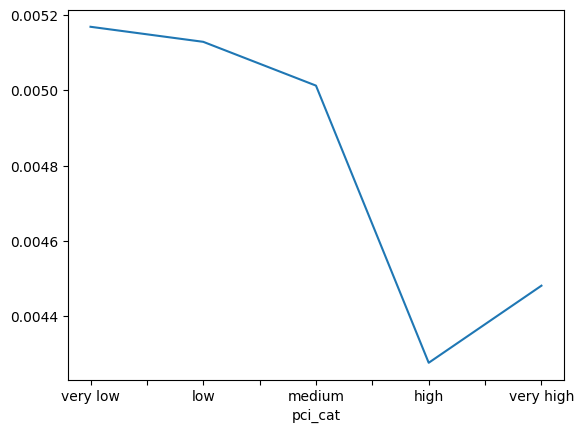

In [311]:
(
    (combined.groupby('pci_cat')['cases_aug'].sum() - combined.groupby('pci_cat')['cases_jul'].sum()) \
    / combined.groupby('pci_cat')['pop19'].sum()
).plot()

<Axes: xlabel='pci', ylabel='death_rate'>

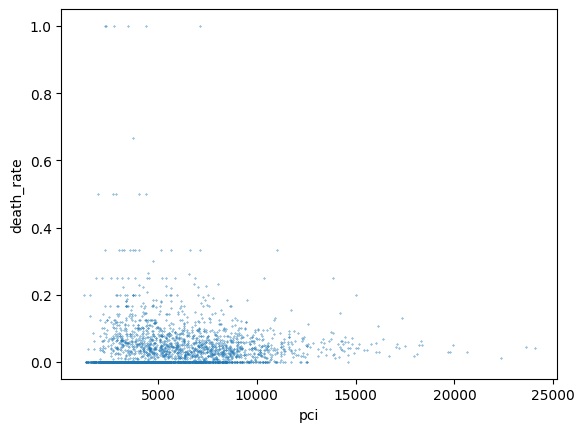

In [234]:
combined.plot.scatter(x='pci', y='death_rate', s=0.1)

In [183]:
combined.to_file('output/output.gpkg')

In [235]:
#combined
combined.loc[:, 'pop19':].corr()

,pop19,age,hh_income,insured,bachelors,pci,cases,deaths,death_rate,cases_pop,deaths_pop
pop19,1.000000,-0.173840,0.263147,0.044980,0.329629,0.507107,0.608403,0.546474,0.030666,0.120917,0.141399
age,-0.173840,1.000000,-0.118775,0.240650,-0.157607,-0.315734,-0.083897,-0.065093,0.029394,-0.107786,-0.050610
hh_income,0.263147,-0.118775,1.000000,0.255195,0.664284,0.305996,0.249015,0.236225,0.005425,0.103047,0.088781
insured,0.044980,0.240650,0.255195,1.000000,0.305353,0.073440,0.061656,0.072496,0.024906,-0.008443,0.009056
bachelors,0.329629,-0.157607,0.664284,0.305353,1.000000,0.450489,0.251915,0.244255,0.021782,0.079140,0.100366
pci,0.507107,-0.315734,0.305996,0.073440,0.450489,1.000000,0.338936,0.315511,0.040008,0.129288,0.134705
cases,0.608403,-0.083897,0.249015,0.061656,0.251915,0.338936,1.000000,0.941050,0.034298,0.445363,0.436405
deaths,0.546474,-0.065093,0.236225,0.072496,0.244255,0.315511,0.941050,1.000000,0.065490,0.404948,0.492186
death_rate,0.030666,0.029394,0.005425,0.024906,0.021782,0.040008,0.034298,0.065490,1.000000,0.039500,0.317223
cases_pop,0.120917,-0.107786,0.103047,-0.008443,0.079140,0.129288,0.445363,0.404948,0.039500,1.000000,0.611895


## Get cumulative Covid-19 cases (NY Times)

In [178]:
death_rates

,fips,date,cases,deaths,death_rate
0,01001,2020-12-31,370662,5683.0,1.533203
1,01003,2020-12-31,1127507,12446.0,1.103851
2,01005,2020-12-31,174840,2035.0,1.163921
3,01007,2020-12-31,148219,2687.0,1.812858
4,01009,2020-12-31,349468,3855.0,1.103105
...,...,...,...,...,...
3213,72151,2020-12-31,64653,0.0,0.000000
3214,72153,2020-12-31,86823,0.0,0.000000
3215,78010,2020-12-31,85623,971.0,1.134041
3216,78020,2020-12-31,11404,120.0,1.052262


In [ ]:
combined.merge(death_rate)